In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('penguins-data.csv')
df.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [26]:
#tính số lượng của mỗi loài: 
soLuongMoiLoai = df['species'].value_counts()
soLuongMoiLoai

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [27]:
soLuongChimCanhCutTrenMoiDao = df.groupby(['island','species']).size().reset_index(name = 'count')
soLuongChimCanhCutTrenMoiDao

,island,species,count
0,Biscoe,Adelie,44
1,Biscoe,Gentoo,119
2,Dream,Adelie,55
3,Dream,Chinstrap,68
4,Torgersen,Adelie,47


In [28]:
colums = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
thongKe = df.groupby('species')[colums].agg(['mean','median','std'])
thongKe

bill_length_mm                  bill_depth_mm         ... flipper_length_mm            body_mass_g                    
                    mean median       std          mean median  ...            median       std         mean  median         std
species                                                         ...                                                             
Adelie         38.823973  38.85  2.662597     18.347260  18.40  ...             190.0  6.521825  3706.164384  3700.0  458.620135
Chinstrap      48.833824  49.55  3.339256     18.420588  18.45  ...             196.0  7.131894  3733.088235  3700.0  384.335081
Gentoo         47.568067  47.40  3.106116     14.996639  15.00  ...             216.0  6.585431  5092.436975  5050.0  501.476154

[3 rows x 12 columns]

# cau 3

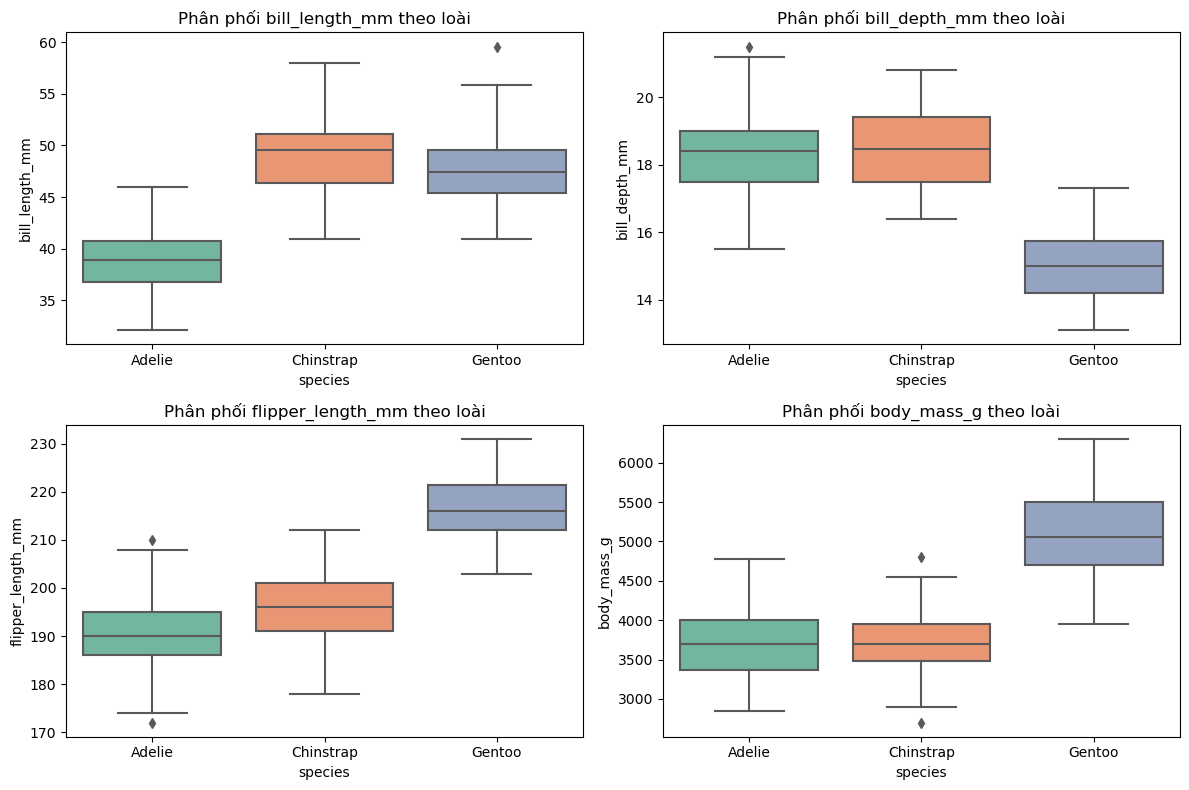

In [29]:

# Vẽ boxplot cho từng đặc trưng
plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=col, data=df, palette="Set2")
    plt.title(f"Phân phối {col} theo loài")

plt.tight_layout()
plt.show()


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

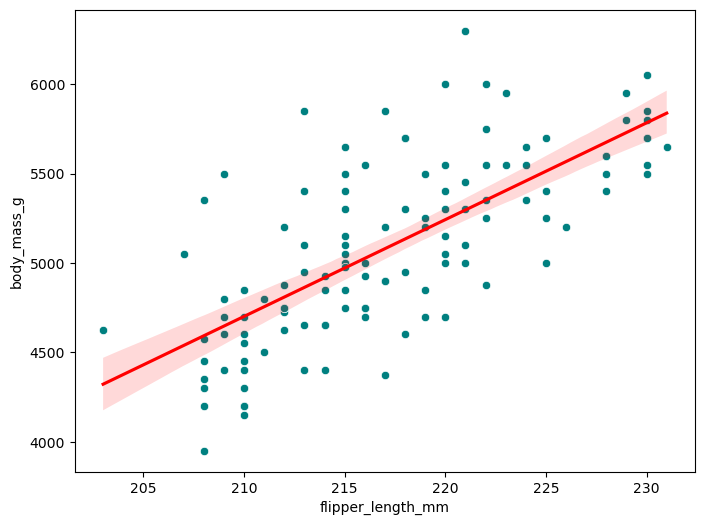

In [33]:
#caau 4:
gentoo = df[df['species'] == 'Gentoo']
plt.figure(figsize=(8,6))
sns.scatterplot(x="flipper_length_mm",y="body_mass_g",data=gentoo,color="teal")
# Thêm đường hồi quy để thấy xu hướng
sns.regplot( x="flipper_length_mm", y="body_mass_g", data=gentoo, scatter=False,color="red")
plt.title("Mối quan hệ giữa độ dài cánh và trọng lượng (Gentoo)")
plt.xlabel("Độ dài cánh (mm)")
plt.ylabel("Trọng lượng (g)")
plt.show()

nhinf vào đồ thị ta có thể thấy cánh càng dài thì cân nặng càng lướn  
giải thích: vì cánh càng dài thì cho thấy cá thể đó càng trưởng thành, càng trưởng thành thì cân nặng sẽ cao hơn là những con non

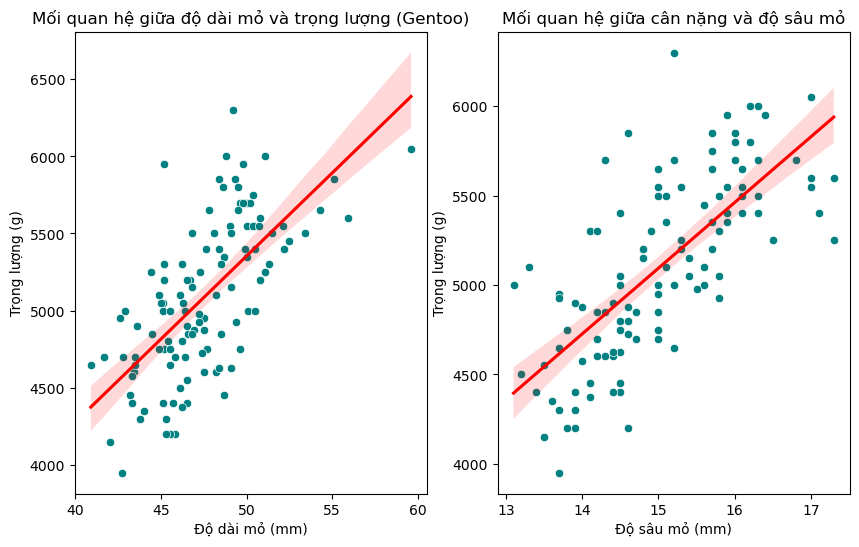

In [38]:
gentoo = df[df['species'] == 'Gentoo']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(x="bill_length_mm",y="body_mass_g",data=gentoo,color="teal")
# Thêm đường hồi quy để thấy xu hướng
sns.regplot( x="bill_length_mm", y="body_mass_g", data=gentoo, scatter=False,color="red")
plt.title("Mối quan hệ giữa độ dài mỏ và trọng lượng (Gentoo)")
plt.xlabel("Độ dài mỏ (mm)")
plt.ylabel("Trọng lượng (g)")


plt.subplot(1,2,2)
sns.scatterplot(x="bill_depth_mm",y="body_mass_g",data=gentoo,color="teal")
# Thêm đường hồi quy để thấy xu hướng
sns.regplot( x="bill_depth_mm", y="body_mass_g", data=gentoo, scatter=False,color="red")
plt.title("Mối quan hệ giữa cân nặng và độ sâu mỏ")
plt.xlabel("Độ sâu mỏ (mm)")
plt.ylabel("Trọng lượng (g)")
plt.show()

In [ ]:
nhận xét: tương tự như độ dài cánh, độ dài và độ sâu của mỏ cũng có liên quan đến cân nặng của vịt và cũng có thể giải thích như trên